# ECE1232 Grating Project - Mark Jordan

In [1]:
# This code was written by Mark Jordan
# last modified 3/1/2018

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

In [89]:
n1 = 1.5
delta_n1 = .1*10**(-4)
delta_n2 = 2*10**(-4)
delta_n3 = 5*10**(-4)
delta_n4 = 10*10**(-4)

In [90]:
def find_n2(n1,delta_n):
    n2 = n1+delta_n
    return n2

In [91]:
n2_1 = find_n2(n1,delta_n1)
n2_2 = find_n2(n1,delta_n2)
n2_3 = find_n2(n1,delta_n3)
n2_4 = find_n2(n1,delta_n4)
theta = 0

In [92]:
def r_TE(n1,n3,thetai, thetat):
    r_te = (n1*np.cos(thetai)-n3*np.cos(thetat))/(n1*np.cos(thetai)+n3*np.cos(thetat))
    return r_te

In [93]:
def t_TE(n1,n3,thetai, thetat):
    t_te = (2*n1*np.cos(thetai))/(n1*np.cos(thetai)+n3*np.cos(thetat))
    return t_te

In [94]:
def finding_R(r):
    R = np.absolute(r)**2
    return R

In [95]:
r_12_1 = r_TE(n1,n2_1,theta,theta)
r_21_1 = r_TE(n2_1,n1,theta,theta)

r_12_2 = r_TE(n1,n2_2,theta,theta)
r_21_2 = r_TE(n2_2,n1,theta,theta)

r_12_3 = r_TE(n1,n2_3,theta,theta)
r_21_3 = r_TE(n2_3,n1,theta,theta)

r_12_4 = r_TE(n1,n2_4,theta,theta)
r_21_4 = r_TE(n2_4,n1,theta,theta)

In [96]:
r_12_array = np.array([[r_12_1],[r_12_2],[r_12_3],[r_12_4]])
print(r_12_array)

[[ -3.33332222e-06]
 [ -6.66622225e-05]
 [ -1.66638894e-04]
 [ -3.33222259e-04]]


In [97]:
r_21_array = np.array([[r_21_1],[r_21_2],[r_21_3],[r_21_4]])
print(r_21_array)

[[  3.33332222e-06]
 [  6.66622225e-05]
 [  1.66638894e-04]
 [  3.33222259e-04]]


In [98]:
t_12_1 = t_TE(n1,n2_1,theta,theta)
t_21_1 = t_TE(n2_1,n1,theta,theta)

t_12_2 = t_TE(n1,n2_2,theta,theta)
t_21_2 = t_TE(n2_2,n1,theta,theta)

t_12_3 = t_TE(n1,n2_3,theta,theta)
t_21_3 = t_TE(n2_3,n1,theta,theta)

t_12_4 = t_TE(n1,n2_4,theta,theta)
t_21_4 = t_TE(n2_4,n1,theta,theta)

In [99]:
t_12_array = np.array([[t_12_1],[t_12_2],[t_12_3],[t_12_4]])
print(t_12_array)

[[ 0.99999667]
 [ 0.99993334]
 [ 0.99983336]
 [ 0.99966678]]


In [100]:
t_21_array = np.array([[t_21_1],[t_21_2],[t_21_3],[t_21_4]])
print(t_21_array)

[[ 1.00000333]
 [ 1.00006666]
 [ 1.00016664]
 [ 1.00033322]]


In [101]:
def Matrix12(r,t):
    M12 = (1/t)*np.array([[1,r],[r,1]])
    return M12
def Matrix2_free(phi_z,size_of_array):
    j = size_of_array
    i = 0
    M2_free = np.zeros(j, dtype=object)
    #print("M2_free",M2_free)
    while i < j:
        M2_free[i] = np.array([[np.exp(phi_z[i]*1j),0],[0,np.exp(phi_z[i]*(-1j))]])
        i+=1
    #M2_free = np.array([[np.exp(phi_z*1j),0],[0,np.exp(phi_z*(-1j))]])
    return M2_free
def phi_z(n,d,theta,lambda_wavelength):
    phi = 2*np.pi*n*d*np.cos(theta)/lambda_wavelength
    return phi

In [102]:
period_length = 1*10**(-6)
d = period_length/2
size_of_array = 1000
wavelength = np.linspace(1350*10**-9,1750*10**-9,size_of_array)

In [103]:
phi_z_1 = phi_z(n1,d,theta,wavelength)
phi_z_2_1 = phi_z(n2_1,d,theta,wavelength)
phi_z_2_2 = phi_z(n2_2,d,theta,wavelength)
phi_z_2_3 = phi_z(n2_3,d,theta,wavelength)
phi_z_2_4 = phi_z(n2_4,d,theta,wavelength)
phi_z_2_array = np.zeros(4, dtype=object)
phi_z_2_array[0] = phi_z_2_1
phi_z_2_array[1] = phi_z_2_2
phi_z_2_array[2] = phi_z_2_3
phi_z_2_array[3] = phi_z_2_4
print(phi_z_2_array[0][0])

3.49068177505


### start repeating below this

In [104]:
M12 = Matrix12(r_12_array[0],t_12_array[0])
M2 = Matrix2_free(phi_z_2_array[0],size_of_array)
M21 = Matrix12(r_21_array[0],t_21_array[0])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

[[ -9.39687794e-01 -3.42043151e-01j   3.13228220e-06 -1.14014004e-06j]
 [  3.13228220e-06 +1.14014004e-06j  -9.39687794e-01 +3.42043151e-01j]]


In [105]:
j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

[[ -9.39687794e-01 -3.42043151e-01j   3.13228220e-06 -1.14014004e-06j]
 [  3.13228220e-06 +1.14014004e-06j  -9.39687794e-01 +3.42043151e-01j]]


In [106]:
j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1

In [107]:
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1

In [108]:
M_period = M122211
M_temp = np.copy(M_period)
print(M_period[0])
print(M_temp[0])
number_of_periods = 10000
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
    #print(i)
print(M_temp[0])
print(M_period[0])

[[  7.66029485e-01 +6.42805436e-01j   7.79899118e-07 +2.14275521e-06j]
 [  7.79899118e-07 -2.14275521e-06j   7.66029485e-01 -6.42805436e-01j]]
[[  7.66029485e-01 +6.42805436e-01j   7.79899118e-07 +2.14275521e-06j]
 [  7.79899118e-07 -2.14275521e-06j   7.66029485e-01 -6.42805436e-01j]]
[[  5.97158559e-01 +8.02123217e-01j   9.73195237e-07 +2.67383194e-06j]
 [  9.73195237e-07 -2.67383194e-06j   5.97158559e-01 -8.02123217e-01j]]
[[  7.66029485e-01 +6.42805436e-01j   7.79899118e-07 +2.14275521e-06j]
 [  7.79899118e-07 -2.14275521e-06j   7.66029485e-01 -6.42805436e-01j]]


In [109]:
j = size_of_array
i = 0
r_total1 = np.zeros(j, dtype=object)
R_total1 = np.zeros(j, dtype=object)
while i < j:
    r_total1[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total1[i] = (np.absolute(r_total1[i]))**2
    i+=1

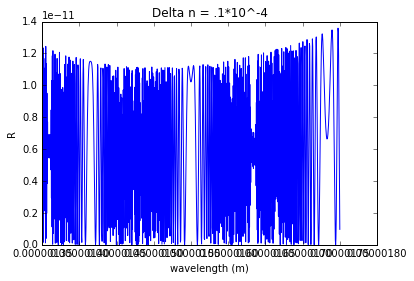

In [110]:
plt.plot(wavelength, R_total1)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = .1*10^-4")

[1450, 1550, 0, 6]

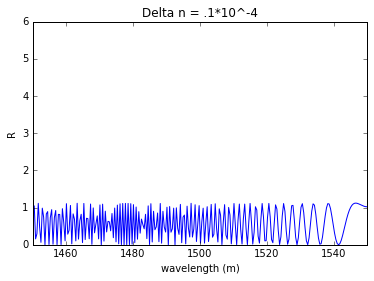

In [111]:
plt.plot(wavelength*10**9, R_total1*10**11)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = .1*10^-4")
plt.axis([1450,1550,0,6])

In [112]:
j = size_of_array
i = 0
t_total1 = np.zeros(j, dtype=object)
T_total1 = np.zeros(j, dtype=object)
while i < j:
    t_total1[i] = 1/M_temp[i][0][0]
    T_total1[i] = (np.absolute(t_total1[i]))**2
    i+=1

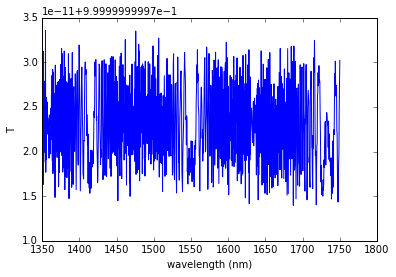

In [116]:
plt.plot(wavelength*10**9, T_total1)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
#plt.title("Delta n = .1*10^-4")

In [28]:
M12 = Matrix12(r_12_array[1],t_12_array[1])
M2 = Matrix2_free(phi_z_2_array[1],size_of_array)
M21 = Matrix12(r_21_array[1],t_21_array[1])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

[[ -9.39595971e-01 -3.42480290e-01j   6.26355557e-05 -2.28304973e-05j]
 [  6.26355557e-05 +2.28304973e-05j  -9.39595971e-01 +3.42480290e-01j]]


In [29]:
j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

[[ -9.39595971e-01 -3.42480290e-01j   6.26355557e-05 -2.28304973e-05j]
 [  6.26355557e-05 +2.28304973e-05j  -9.39595971e-01 +3.42480290e-01j]]


In [30]:
j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1

In [31]:
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1

In [32]:
M_period = M122211
M_temp = np.copy(M_period)
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
print(M_temp[0])

[[  5.97171575e-01 -8.02113529e-01j  -1.94758163e-05 -5.35093654e-05j]
 [ -1.94758163e-05 +5.35093654e-05j   5.97171575e-01 +8.02113529e-01j]]


In [33]:
j = size_of_array
i = 0
r_total2 = np.zeros(j, dtype=object)
R_total2 = np.zeros(j, dtype=object)
while i < j:
    r_total2[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total2[i] = (np.absolute(r_total2[i]))**2
    i+=1

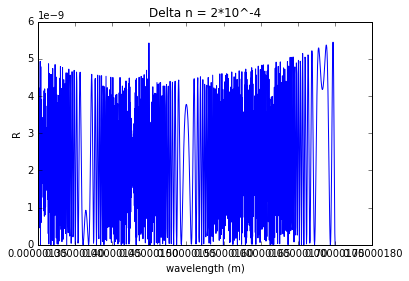

In [34]:
plt.plot(wavelength, R_total2)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 2*10^-4")

[1450, 1550, 0, 6]

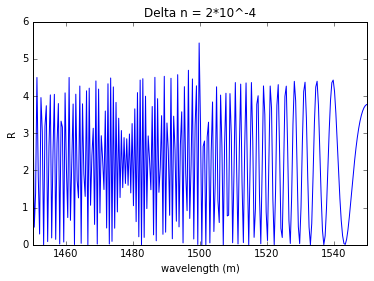

In [35]:
plt.plot(wavelength*10**9, R_total2*10**9)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 2*10^-4")
plt.axis([1450,1550,0,6])

In [36]:
j = size_of_array
i = 0
t_total2 = np.zeros(j, dtype=object)
T_total2 = np.zeros(j, dtype=object)
while i < j:
    t_total2[i] = 1/M_temp[i][0][0]
    T_total2[i] = (np.absolute(t_total2[i]))**2
    i+=1

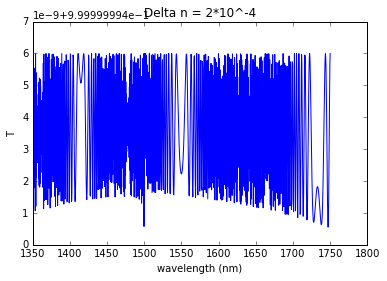

In [37]:
plt.plot(wavelength*10**9, T_total2)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 2*10^-4")

[[ -9.39450575e-01 -3.43170479e-01j   1.56549004e-04 -5.71855489e-05j]
 [  1.56549004e-04 +5.71855489e-05j  -9.39450575e-01 +3.43170479e-01j]]
[[ -9.39450575e-01 -3.43170479e-01j   1.56549004e-04 -5.71855489e-05j]
 [  1.56549004e-04 +5.71855489e-05j  -9.39450575e-01 +3.43170479e-01j]]
[[  9.73068216e-01 -2.30517351e-01j  -1.40065188e-05 -3.84825942e-05j]
 [ -1.40065188e-05 +3.84825942e-05j   9.73068216e-01 +2.30517351e-01j]]


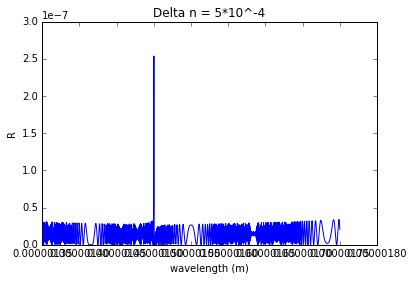

In [38]:
M12 = Matrix12(r_12_array[2],t_12_array[2])
M2 = Matrix2_free(phi_z_2_array[2],size_of_array)
M21 = Matrix12(r_21_array[2],t_21_array[2])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1
    
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1
    
M_period = M122211
M_temp = np.copy(M_period)
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
print(M_temp[0])

j = size_of_array
i = 0
r_total3 = np.zeros(j, dtype=object)
R_total3 = np.zeros(j, dtype=object)
while i < j:
    r_total3[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total3[i] = (np.absolute(r_total3[i]))**2
    i+=1
    
plt.plot(wavelength, R_total3)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 5*10^-4")

[1450, 1550, 0, 3]

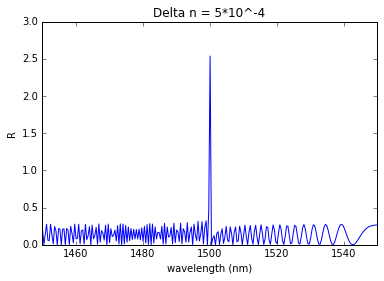

In [39]:
plt.plot(wavelength*10**9, R_total3*10**7)
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("Delta n = 5*10^-4")
plt.axis([1450,1550,0,3])

In [40]:
j = size_of_array
i = 0
t_total3 = np.zeros(j, dtype=object)
T_total3 = np.zeros(j, dtype=object)
while i < j:
    t_total3[i] = 1/M_temp[i][0][0]
    T_total3[i] = (np.absolute(t_total3[i]))**2
    i+=1

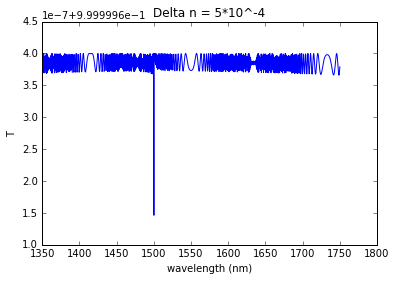

In [41]:
plt.plot(wavelength*10**9, T_total3)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 5*10^-4")

[[ -9.39207125e-01 -3.44320715e-01j   3.12964720e-04 -1.14735326e-04j]
 [  3.12964720e-04 +1.14735326e-04j  -9.39207125e-01 +3.44320715e-01j]]
[[ -9.39207125e-01 -3.44320715e-01j   3.12964720e-04 -1.14735326e-04j]
 [  3.12964720e-04 +1.14735326e-04j  -9.39207125e-01 +3.44320715e-01j]]
[[  3.96452163e-01 -9.18055439e-01j  -1.11746493e-04 -3.07020966e-04j]
 [ -1.11746493e-04 +3.07020966e-04j   3.96452163e-01 +9.18055439e-01j]]


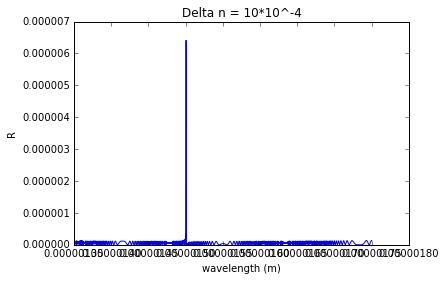

In [42]:
M12 = Matrix12(r_12_array[3],t_12_array[3])
M2 = Matrix2_free(phi_z_2_array[3],size_of_array)
M21 = Matrix12(r_21_array[3],t_21_array[3])
M1 = Matrix2_free(phi_z_1,size_of_array)
#print(M12)
#print(M2[0])
A = np.dot(M12,M2[0])
#print(np.dot(M12,M2[0]))
print(A)

j = size_of_array
i = 0
M122 = np.zeros(j, dtype=object)
while i < j:
    M122[i] = np.dot(M12,M2[i])
    i+=1
#print(M122)
print(M122[0])

j = size_of_array
i = 0
M12221 = np.zeros(j, dtype=object)
while i < j:
    M12221[i] = np.dot(M122[i],M21)
    i+=1
    
j = size_of_array
i = 0
M122211 = np.zeros(j, dtype=object)
while i < j:
    M122211[i] = np.dot(M12221[i],M1[i])
    i+=1
    
M_period = M122211
M_temp = np.copy(M_period)
i = 0
j = number_of_periods-1
while i < j:
    k = 0
    m = size_of_array
    while k < m:
        M_temp[k] = np.dot(M_temp[k],M_period[k])
        k+=1
    i+=1
print(M_temp[0])

j = size_of_array
i = 0
r_total4 = np.zeros(j, dtype=object)
R_total4 = np.zeros(j, dtype=object)
while i < j:
    r_total4[i] = M_temp[i][1][0]/M_temp[i][0][0]
    R_total4[i] = (np.absolute(r_total4[i]))**2
    i+=1
    
plt.plot(wavelength, R_total4)
plt.xlabel("wavelength (m)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")

[1450, 1550, 0, 7]

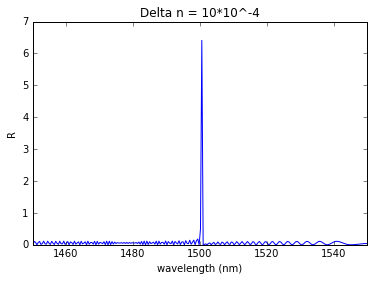

In [43]:
plt.plot(wavelength*10**9, R_total4*10**6)
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("Delta n = 10*10^-4")
plt.axis([1450,1550,0,7])

In [44]:
j = size_of_array
i = 0
t_total4 = np.zeros(j, dtype=object)
T_total4 = np.zeros(j, dtype=object)
while i < j:
    t_total4[i] = 1/M_temp[i][0][0]
    T_total4[i] = (np.absolute(t_total4[i]))**2
    i+=1

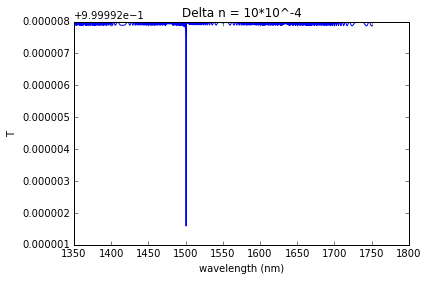

In [45]:
plt.plot(wavelength*10**9, T_total4)
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("Delta n = 10*10^-4")

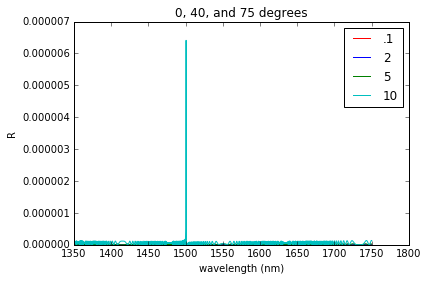

In [46]:
plt.plot(wavelength*10**9, R_total1, color='r', label=".1")
plt.plot(wavelength*10**9, R_total2, color='b', label="2")
plt.plot(wavelength*10**9, R_total3, color='g', label="5")
plt.plot(wavelength*10**9, R_total4, color='c', label="10")
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("All delta n")
plt.legend(loc=1)
plt.title("0, 40, and 75 degrees")

[1450, 1550, 0, 7]

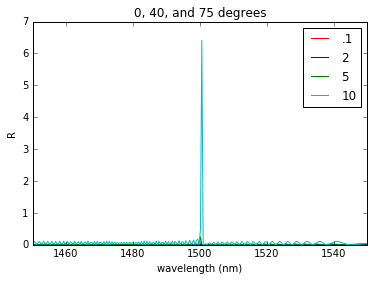

In [47]:
plt.plot(wavelength*10**9, R_total1*10**6, color='r', label=".1")
plt.plot(wavelength*10**9, R_total2*10**6, color='b', label="2")
plt.plot(wavelength*10**9, R_total3*10**6, color='g', label="5")
plt.plot(wavelength*10**9, R_total4*10**6, color='c', label="10")
plt.xlabel("wavelength (nm)")
plt.ylabel("R")
plt.title("All delta n")
plt.legend(loc=1)
plt.title("0, 40, and 75 degrees")
plt.axis([1450,1550,0,7])

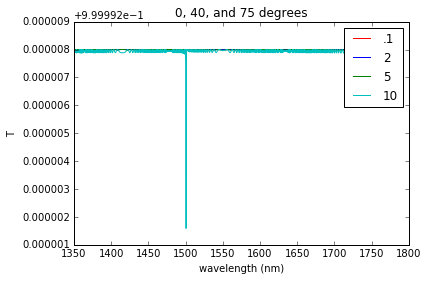

In [48]:
plt.plot(wavelength*10**9, T_total1, color='r', label=".1")
plt.plot(wavelength*10**9, T_total2, color='b', label="2")
plt.plot(wavelength*10**9, T_total3, color='g', label="5")
plt.plot(wavelength*10**9, T_total4, color='c', label="10")
plt.xlabel("wavelength (nm)")
plt.ylabel("T")
plt.title("All delta n")
plt.legend(loc=1)
plt.title("0, 40, and 75 degrees")

# Need to fix transmission spectrum (probably something to do with nt/ni)

# Problem 2

In [ ]:
n1 = 1.5
delta_n1 = .1*10**(-4)
delta_n2 = 2*10**(-4)
delta_n3 = 5*10**(-4)
delta_n4 = 10*10**(-4)

In [ ]:
def find_n2(n1,delta_n):
    n2 = n1+delta_n
    return n2

In [ ]:
n2_1 = find_n2(n1,delta_n1)
n2_2 = find_n2(n1,delta_n2)
n2_3 = find_n2(n1,delta_n3)
n2_4 = find_n2(n1,delta_n4)
theta = 0

In [ ]:
def r_Normal_2(n1,n2,delta_n0):
    r_normal = (n1-n2)/(n1+n2)
    return r_normal

In [ ]:
def Matrix12(r,t):
    M12 = (1/t)*np.array([[1,r],[r,1]])
    return M12
def Matrix2_free(phi_z,size_of_array):
    j = size_of_array
    i = 0
    M2_free = np.zeros(j, dtype=object)
    #print("M2_free",M2_free)
    while i < j:
        M2_free[i] = np.array([[np.exp(phi_z[i]*1j),0],[0,np.exp(phi_z[i]*(-1j))]])
        i+=1
    #M2_free = np.array([[np.exp(phi_z*1j),0],[0,np.exp(phi_z*(-1j))]])
    return M2_free
def phi_z(n,d,theta,lambda_wavelength):
    phi = 2*np.pi*n*d*np.cos(theta)/lambda_wavelength
    return phi

In [ ]:
r_12_1 = r_TE(n1,n2_1,theta,theta)
r_21_1 = r_TE(n2_1,n1,theta,theta)

r_12_2 = r_TE(n1,n2_2,theta,theta)
r_21_2 = r_TE(n2_2,n1,theta,theta)

r_12_3 = r_TE(n1,n2_3,theta,theta)
r_21_3 = r_TE(n2_3,n1,theta,theta)

r_12_4 = r_TE(n1,n2_4,theta,theta)
r_21_4 = r_TE(n2_4,n1,theta,theta)

## New stuff for problem 2 below

In [123]:
def delta_n(delta_n0,z,L,sigma_L):
    Delta_n = delta_n0*np.exp(-((z-(L/2))**2)/(sigma_L**2))
    return Delta_n

In [124]:
def finding_z(z,period_number):
    new_z = period_number*10**(-9)
    return Delta_z

In [ ]:
def find_n2(n1,delta_n):
    n2 = n1+delta_n
    return n2

In [ ]:
period_length = 1*10**(-6)
d = period_length/2
size_of_array = 1000
wavelength = np.linspace(1350*10**-9,1750*10**-9,size_of_array)

In [125]:
n1 = 1.5
L = 0.01
sigma_L = 0.0025
delta_n0 = 10*10**(-4)
z = 0